In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics \
import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True

In [3]:
DF = pd.read_excel("C:\\Users\\am236\\OneDrive - DXC Production\\anup\\NBFCFinalData.xlsx")
DF

,Unnamed: 0,AUTHORIZATIONDATE,BALANCE_EXCESS,BALANCE_TENURE,CITY,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,...,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,PRODUCT,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,FORECLOSURE
0,0,2010-08-29,0.0,0,MUMBAI,45,13.421934,13.734072,13.421934,1,...,2.725723e+06,1.159366e+07,7994.273589,0.0,7994.273589,HL,0,0,45,1
1,1,2010-09-15,0.0,99,MUMBAI,38,13.734072,13.734072,13.734072,0,...,4.945154e+06,6.942656e+06,100504.575864,0.0,100504.575864,HL,0,0,38,1
2,2,2010-11-02,0.0,231,MUMBAI,81,15.606900,16.231176,15.606900,2,...,2.990124e+06,9.392115e+05,5947.630536,0.0,5947.630536,HL,0,0,81,1
3,3,2010-10-06,0.0,0,THANE,91,11.236968,13.734072,11.236968,4,...,4.648994e+06,9.979637e+06,60322.180776,0.0,60322.180776,HL,0,0,91,1
4,4,2010-10-26,0.0,215,MUMBAI,89,14.982624,15.606900,14.982624,2,...,6.593778e+06,5.552847e+05,27732.787464,0.0,27732.787464,HL,0,0,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,20007,2015-06-30,0.0,240,PUNE,0,13.421934,13.421934,13.421934,0,...,1.381342e+04,0.000000e+00,20320.886952,0.0,20320.886952,HL,0,0,1,0
19761,20008,2015-06-29,0.0,240,HYDERABAD,0,13.109796,13.109796,13.109796,0,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,HL,0,0,0,0
19762,20009,2015-07-31,0.0,96,AHMEDABAD,0,15.606900,15.606900,15.606900,0,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,LAP,0,0,0,0
19763,20010,2015-08-31,0.0,60,BANGALORE,0,15.606900,15.606900,15.606900,0,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,LAP,0,0,0,0


In [4]:
DF.shape

(19765, 51)

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           19765 non-null  int64         
 1   AUTHORIZATIONDATE                    19765 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       19765 non-null  float64       
 3   BALANCE_TENURE                       19765 non-null  int64         
 4   CITY                                 19765 non-null  object        
 5   COMPLETED_TENURE                     19765 non-null  int64         
 6   CURRENT_INTEREST_RATE                19765 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            19765 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            19765 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        19765 non-null  int64         
 10  CURRENT_TE

In [6]:
# Dropping the unimportant columns.
DF.drop(['AUTHORIZATIONDATE','CITY','CURRENT_INTEREST_RATE_MIN','CURRENT_INTEREST_RATE_CHANGES','COMPLETED_TENURE','CURRENT_TENOR','BALANCE_EXCESS','CURRENT_INTEREST_RATE','DIFF_EMI_AMOUNT_MAX_MIN','DIFF_CURRENT_INTEREST_RATE_MAX_MIN','DIFF_AUTH_INT_DATE','DIFF_ORIGINAL_CURRENT_TENOR','DIFF_ORIGINAL_CURRENT_INTEREST_RATE','EMI_AMOUNT','EMI_RECEIVED_AMT','EXCESS_ADJUSTED_AMT','EXCESS_AVAILABLE','INTEREST_START_DATE','LAST_RECEIPT_DATE','LAST_RECEIPT_AMOUNT','LATEST_TRANSACTION_MONTH','MIN_EMI_AMOUNT','MAX_EMI_AMOUNT','MONTHOPENING','NUM_LOW_FREQ_TRANSACTIONS','LOAN_AMT','ORIGNAL_INTEREST_RATE','ORIGNAL_TENOR','PAID_INTEREST','PAID_PRINCIPAL','PRE_EMI_DUEAMT','PRE_EMI_OS_AMOUNT','PRE_EMI_RECEIVED_AMT','MOB','NPA_IN_LAST_MONTH','NET_DISBURSED_AMT','NUM_EMI_CHANGES','Unnamed: 0'], inplace=True, axis = 1)

In [7]:
DF['DUEDAY'] = DF['DUEDAY'].astype('category')

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   BALANCE_TENURE             19765 non-null  int64   
 1   CURRENT_INTEREST_RATE_MAX  19765 non-null  float64 
 2   DPD                        19765 non-null  int64   
 3   DUEDAY                     19765 non-null  category
 4   EMI_DUEAMT                 19765 non-null  float64 
 5   EMI_OS_AMOUNT              19765 non-null  float64 
 6   FOIR                       19765 non-null  float64 
 7   NET_LTV                    19765 non-null  float64 
 8   NET_RECEIVABLE             19765 non-null  float64 
 9   OUTSTANDING_PRINCIPAL      19765 non-null  float64 
 10  PRODUCT                    19765 non-null  object  
 11  NPA_IN_CURRENT_MONTH       19765 non-null  int64   
 12  FORECLOSURE                19765 non-null  int64   
dtypes: category(1), float64(7), int

In [9]:
# Correlation matrix
cor = DF.corr().drop(['FORECLOSURE'])
cor


,BALANCE_TENURE,CURRENT_INTEREST_RATE_MAX,DPD,EMI_DUEAMT,EMI_OS_AMOUNT,FOIR,NET_LTV,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,NPA_IN_CURRENT_MONTH,FORECLOSURE
BALANCE_TENURE,1.000000,-0.430190,-0.057513,-0.213403,-0.022318,-0.013433,0.278831,0.002239,0.002870,-0.052916,-0.044968
CURRENT_INTEREST_RATE_MAX,-0.430190,1.000000,0.093297,0.117767,0.036097,-0.001570,-0.333309,0.020091,-0.062065,0.082952,0.024785
DPD,-0.057513,0.093297,1.000000,0.071465,0.562685,-0.000816,0.017445,0.153809,0.014979,0.779476,0.011488
EMI_DUEAMT,-0.213403,0.117767,0.071465,1.000000,0.160546,0.006721,-0.000045,0.003139,0.535541,0.052096,0.028713
EMI_OS_AMOUNT,-0.022318,0.036097,0.562685,0.160546,1.000000,-0.000345,0.015003,0.218590,0.086674,0.369873,-0.004154
FOIR,-0.013433,-0.001570,-0.000816,0.006721,-0.000345,1.000000,-0.007264,0.000250,0.017899,-0.000725,-0.002209
NET_LTV,0.278831,-0.333309,0.017445,-0.000045,0.015003,-0.007264,1.000000,0.004664,0.046680,0.018666,-0.000287
NET_RECEIVABLE,0.002239,0.020091,0.153809,0.003139,0.218590,0.000250,0.004664,1.000000,-0.069346,0.103141,-0.016446
OUTSTANDING_PRINCIPAL,0.002870,-0.062065,0.014979,0.535541,0.086674,0.017899,0.046680,-0.069346,1.000000,0.013222,0.002150
NPA_IN_CURRENT_MONTH,-0.052916,0.082952,0.779476,0.052096,0.369873,-0.000725,0.018666,0.103141,0.013222,1.000000,0.010471


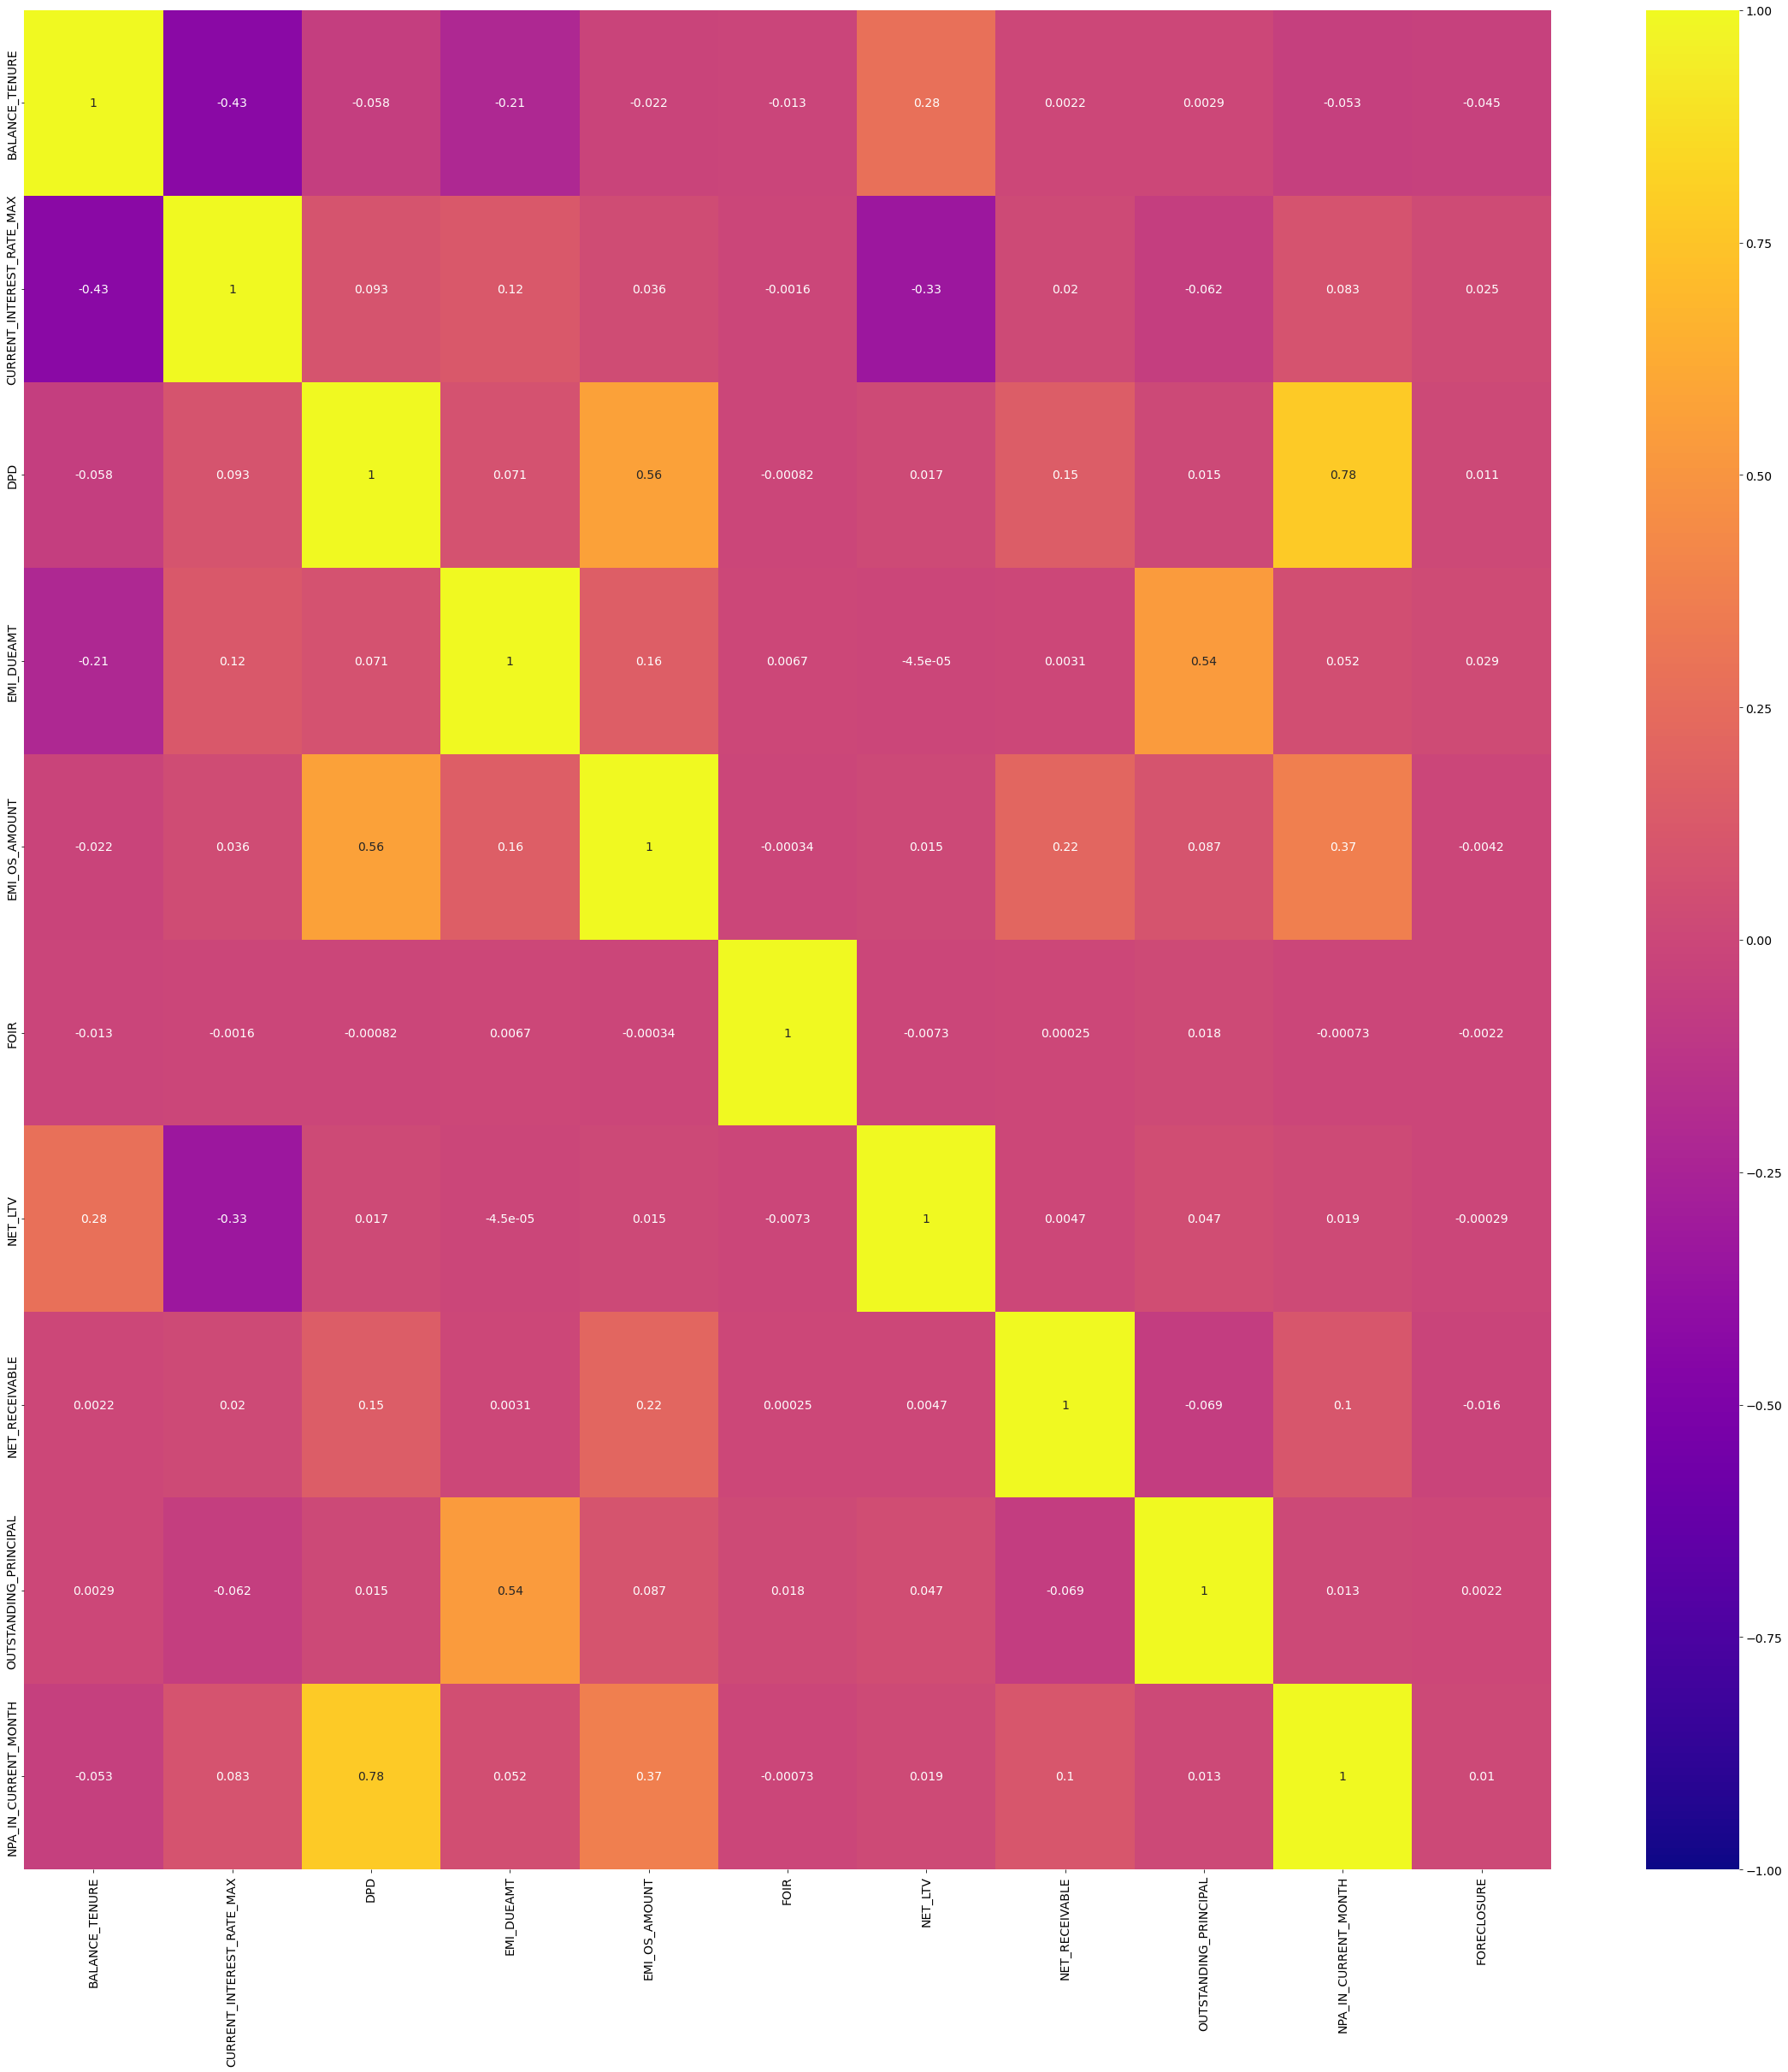

In [10]:
    # View heat map of the correlation matrix
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = 'plasma', annot = True);

In [11]:
num_cols=['BALANCE_TENURE','CURRENT_INTEREST_RATE_MAX','FOIR','NET_LTV','OUTSTANDING_PRINCIPAL','EMI_DUEAMT','EMI_OS_AMOUNT','NET_RECEIVABLE','NPA_IN_CURRENT_MONTH']
cat_cols= ['FORECLOSURE','PRODUCT','DUEDAY']

In [12]:
def remove_outlier(col):
    Q1,Q3 = np.percentile(col,[25, 75])
    IQR = Q3 - Q1
    lower_range= Q1 - (1.5 * IQR)
    upper_range= Q3 + (1.5 * IQR)
    edited_col = np.clip(col, a_min = lower_range, a_max = upper_range)
    return edited_col

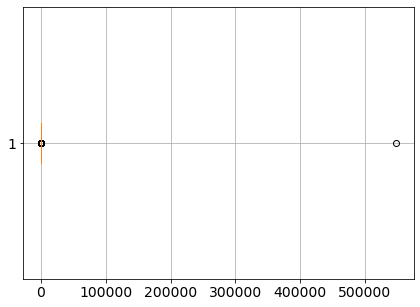

In [13]:
plt.boxplot(DF['FOIR'], vert = False)
plt.show()

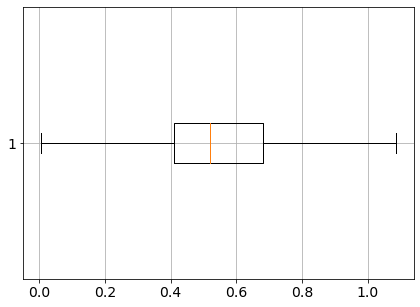

In [14]:
plt.boxplot(remove_outlier(DF['FOIR']), vert = False)
plt.show()

In [15]:
DF['FOIR'] = remove_outlier(DF['FOIR'])

In [16]:
DF = pd.get_dummies(DF, drop_first=True)
DF.head()

,BALANCE_TENURE,CURRENT_INTEREST_RATE_MAX,DPD,EMI_DUEAMT,EMI_OS_AMOUNT,FOIR,NET_LTV,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,NPA_IN_CURRENT_MONTH,FORECLOSURE,DUEDAY_5,DUEDAY_15,PRODUCT_LAP,PRODUCT_STHL,PRODUCT_STLAP
0,0,13.734072,0,8.614898e+06,175477.782641,0.60,40.06,175477.782641,1.164472e+05,0,1,0,0,0,0,0
1,99,13.734072,0,1.061903e+07,279448.084560,0.60,84.31,279448.084560,1.234760e+07,0,1,0,0,0,0,0
2,231,16.231176,0,4.670211e+06,0.000000,0.72,50.89,0.000000,2.994184e+06,0,1,1,0,0,0,0
3,0,13.734072,0,1.313098e+07,63659.280762,0.60,84.63,63659.280762,4.295120e+04,0,1,0,0,0,0,0
4,215,15.606900,0,1.048923e+07,0.000000,0.83,30.94,0.000000,7.200653e+06,0,1,1,0,0,0,0


In [17]:
X = DF.drop('FORECLOSURE', axis=1)
y = DF['FORECLOSURE']

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10, stratify = y)

In [20]:
X_train.head()

,BALANCE_TENURE,CURRENT_INTEREST_RATE_MAX,DPD,EMI_DUEAMT,EMI_OS_AMOUNT,FOIR,NET_LTV,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,NPA_IN_CURRENT_MONTH,DUEDAY_5,DUEDAY_15,PRODUCT_LAP,PRODUCT_STHL,PRODUCT_STLAP
18326,117,19.602266,0,1.152467e+05,0.0,0.55,44.93,0.000000,1.559678e+06,0,1,0,0,0,1
6665,154,12.011070,0,6.219415e+05,0.0,0.33,63.78,0.000000,1.435144e+06,0,1,0,0,1,0
17043,207,14.358348,0,2.134345e+04,0.0,0.39,16.65,-260.609136,3.255335e+05,0,1,0,1,0,0
17678,207,13.734072,0,1.958014e+05,0.0,0.41,61.11,0.000000,4.105786e+06,0,1,0,1,0,0
6513,88,16.418459,0,3.544342e+06,0.0,0.28,61.18,0.000000,4.992082e+06,0,1,0,1,0,0


In [21]:
test2 = pd.concat([X_test,y_test],axis=1, join='inner')

In [22]:
path = 'testdata.csv'
test2.to_csv(path)

In [23]:
from sklearn.preprocessing import StandardScaler
xtrain,xtest,ytrain,ytest= train_test_split(X,y, test_size=0.3,random_state=10)
ss= StandardScaler()


In [24]:
X_train.loc[:, num_cols] = ss.fit_transform(X_train.loc[:, num_cols])
X_train.head()

,BALANCE_TENURE,CURRENT_INTEREST_RATE_MAX,DPD,EMI_DUEAMT,EMI_OS_AMOUNT,FOIR,NET_LTV,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,NPA_IN_CURRENT_MONTH,DUEDAY_5,DUEDAY_15,PRODUCT_LAP,PRODUCT_STHL,PRODUCT_STLAP
18326,-0.886787,1.904661,0,-0.297913,-0.044958,-0.044210,-0.298962,0.037357,-0.310021,-0.102557,1,0,0,0,1
6665,-0.305221,-1.177216,0,-0.217825,-0.044958,-1.013922,0.591092,0.037357,-0.320727,-0.102557,1,0,0,1,0
17043,0.527832,-0.224267,0,-0.312756,-0.044958,-0.749455,-1.634277,0.037181,-0.416114,-0.102557,1,0,1,0,0
17678,0.527832,-0.477711,0,-0.285181,-0.044958,-0.661299,0.465020,0.037357,-0.091146,-0.102557,1,0,1,0,0
6513,-1.342608,0.612097,0,0.244089,-0.044958,-1.234311,0.468326,0.037357,-0.014956,-0.102557,1,0,1,0,0


In [25]:
X_test.loc[:, num_cols] = ss.transform(X_test.loc[:, num_cols])

## Balancing the Train Data using Oversampling


In [26]:
from imblearn import under_sampling, over_sampling
from collections import Counter

In [27]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[(0, 12616), (1, 12616)] (25232,)


# Model Evaluation

Created a user defined function for Model evaluation

In [28]:
def metric(actual_values, predicted_values):
    l = []
    cfm = confusion_matrix(actual_values,predicted_values)
    # print(cfm[0,1],cfm[1,0],cfm[0,1]+cfm[1,0],sep = ',')
    print(cfm)
    
    print('\nClassification Report\n',classification_report(actual_values,predicted_values))
    
    acc = round(accuracy_score(actual_values,predicted_values),4)
    l.append(acc)
    print('\nAccuracy of Model :',acc)
    
    
    
    # Precision value of class 1
    pr = round(precision_score(actual_values,predicted_values),4)
    l.append(pr)
    
    # Recall value of class 1
    re = round(recall_score(actual_values,predicted_values),4)
    l.append(re)
    
    # F1-score value of class 1
    f1 = round(f1_score(actual_values,predicted_values),4)
    l.append(f1)
    
    # Type I error value
    l.append(cfm[0,1])
    
    # Type II error value
    l.append(cfm[1,0])
    
    # Total error value 
    l.append(cfm[0,1]+cfm[1,0])
    
    return l

In [29]:
# Dataframe to store the results of each model

result = pd.DataFrame(columns = ['Algorithm','Overall Accuracy','Precision Value','Recall Value','F1-Score',
                                 'Type I Error','Type II Error', 'Total Error'])

result['Algorithm'] = ['Logistic Regression','Linear Discriminant Analysis','Knn','Decision Tree','Random Forest',
                       'Bagging','AdaBoost','Gradient Boosting']

result.set_index('Algorithm', inplace = True)

Dataframe to store predicted values of each model


In [30]:
prediction = pd.DataFrame()
prediction['Actual Values'] = y_test
pred1 = prediction.copy()
prediction.head()

,Actual Values
7600,0
288,0
15507,0
14842,0
7965,0


# Modelling Approach

### Logistic Regression

In [31]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import classification_report, f1_score

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

Y_pred_log = lr.predict(X_test)
l = metric(y_test,Y_pred_log)

j = 0
for i in result.columns:
    result.loc['Logistic Regression',i] = l[j]
    j += 1
        
prediction['Logistic Regression'] = Y_pred_log


print('Train F1: ', f1_score(y_train, train_pred))
print('Test F1: ', f1_score(y_test, test_pred))


[[5341   67]
 [ 439   83]]

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5408
           1       0.55      0.16      0.25       522

    accuracy                           0.91      5930
   macro avg       0.74      0.57      0.60      5930
weighted avg       0.89      0.91      0.89      5930


Accuracy of Model : 0.9147
Train F1:  0.2952439777640519
Test F1:  0.24702380952380953


In [33]:
#AUC Value
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, test_pred)
logit_roc_auc

0.5733073890815934

(0.0, 1.05)

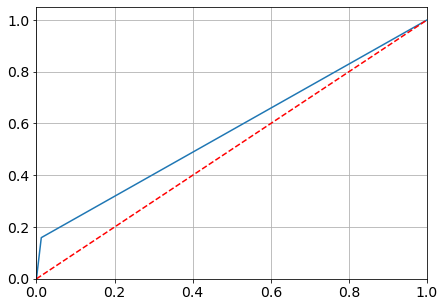

In [34]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, test_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

### LDA

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

train_pred = lda.predict(X_train)
test_pred = lda.predict(X_test)

Y_pred_lda = lda.predict(X_test)
l = metric(y_test,Y_pred_lda)

j = 0
for i in result.columns:
    result.loc['Linear Discriminant Analysis',i] = l[j]
    j += 1
        
prediction['Linear Discriminant Analysis'] = Y_pred_lda


print('Train F1: ', f1_score(y_train, train_pred))
print('Test F1: ', f1_score(y_test, test_pred))

[[5257  151]
 [ 335  187]]

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      5408
           1       0.55      0.36      0.43       522

    accuracy                           0.92      5930
   macro avg       0.75      0.67      0.70      5930
weighted avg       0.91      0.92      0.91      5930


Accuracy of Model : 0.918
Train F1:  0.4431429965836994
Test F1:  0.43488372093023264


In [37]:
#AUC Value
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lda_roc_auc = roc_auc_score(y_test, test_pred)
lda_roc_auc

0.6651579751297921

(0.0, 1.05)

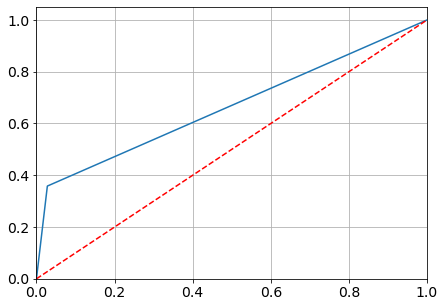

In [38]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, test_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

### KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

Y_pred_knn = knn.predict(X_test)
l = metric(y_test,Y_pred_knn)

j = 0
for i in result.columns:
    result.loc['Knn',i] = l[j]
    j += 1
        
prediction['Knn'] = Y_pred_knn


print('Train F1: ', f1_score(y_train, train_pred))
print('Test F1: ', f1_score(y_test, test_pred))

[[5288  120]
 [ 305  217]]

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      5408
           1       0.64      0.42      0.51       522

    accuracy                           0.93      5930
   macro avg       0.79      0.70      0.73      5930
weighted avg       0.92      0.93      0.92      5930


Accuracy of Model : 0.9283
Train F1:  0.6453178068898593
Test F1:  0.5052386495925495


In [41]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

print('Train F1: ', f1_score(y_train, train_pred))
print('Test F1: ', f1_score(y_test, test_pred))
print('\n')
print(classification_report(y_test, test_pred))

Train F1:  0.5158069883527454
Test F1:  0.42245989304812837


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5408
           1       0.70      0.30      0.42       522

    accuracy                           0.93      5930
   macro avg       0.82      0.65      0.69      5930
weighted avg       0.92      0.93      0.91      5930



In [42]:
knn_roc_auc = roc_auc_score(y_test, test_pred)
knn_roc_auc

0.6450540139200616

(0.0, 1.05)

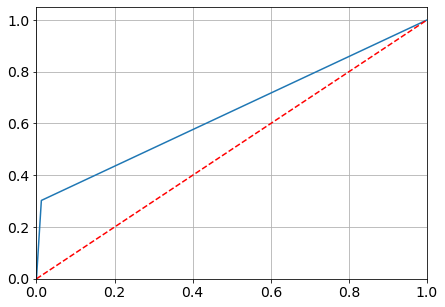

In [43]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, test_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)

Y_pred_dec = dt.predict(X_test)
l = metric(y_test,Y_pred_dec)

j = 0
for i in result.columns:
    result.loc['Decision Tree',i] = l[j]
    j += 1
        
prediction['Decision Tree'] = Y_pred_dec


print('Train F1: ', f1_score(y_train, train_pred))
print('Test F1: ', f1_score(y_test, test_pred))

[[5157  251]
 [ 200  322]]

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      5408
           1       0.56      0.62      0.59       522

    accuracy                           0.92      5930
   macro avg       0.76      0.79      0.77      5930
weighted avg       0.93      0.92      0.93      5930


Accuracy of Model : 0.9239
Train F1:  1.0
Test F1:  0.5881278538812785


In [46]:
decisiontree_roc_auc = roc_auc_score(y_test, test_pred)
decisiontree_roc_auc

0.7852227578272007

(0.0, 1.05)

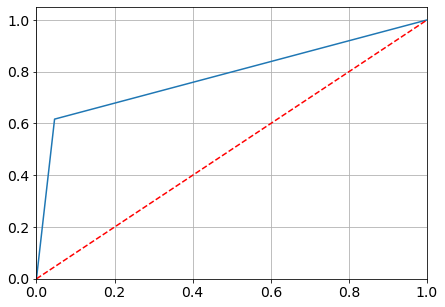

In [47]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, test_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

Y_pred_rf = rf.predict(X_test)
l = metric(y_test,Y_pred_rf)

j = 0
for i in result.columns:
    result.loc['Random Forest',i] = l[j]
    j += 1
        
prediction['Random Forest'] = Y_pred_rf


print('Train F1: ', f1_score(y_train, train_pred))
print('Test F1: ', f1_score(y_test, test_pred))

[[5337   71]
 [ 240  282]]

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5408
           1       0.80      0.54      0.64       522

    accuracy                           0.95      5930
   macro avg       0.88      0.76      0.81      5930
weighted avg       0.94      0.95      0.94      5930


Accuracy of Model : 0.9476
Train F1:  1.0
Test F1:  0.6445714285714286


In [50]:
randomfor_roc_auc = roc_auc_score(y_test, test_pred)
randomfor_roc_auc

0.7635505934163097

(0.0, 1.05)

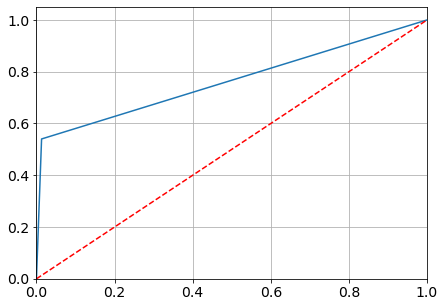

In [51]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, test_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

### Bagging Classifier

In [52]:
from sklearn.ensemble import BaggingClassifier

In [53]:
be = LinearDiscriminantAnalysis()

In [54]:
bag = BaggingClassifier(base_estimator= be, n_estimators= 10, random_state=1 )
bag.fit(X_train, y_train)

train_pred = bag.predict(X_train)
test_pred = bag.predict(X_test)


Y_pred_bag = bag.predict(X_test)
l = metric(y_test,Y_pred_bag)

j = 0
for i in result.columns:
    result.loc['Bagging',i] = l[j]
    j += 1
        
prediction['Bagging'] = Y_pred_bag


print('Train F1: ', f1_score(y_train, train_pred))
print('Test F1: ', f1_score(y_test, test_pred))

[[5257  151]
 [ 345  177]]

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      5408
           1       0.54      0.34      0.42       522

    accuracy                           0.92      5930
   macro avg       0.74      0.66      0.69      5930
weighted avg       0.90      0.92      0.91      5930


Accuracy of Model : 0.9164
Train F1:  0.4306172839506173
Test F1:  0.4164705882352941


In [55]:
baggingclass_roc_auc = roc_auc_score(y_test, test_pred)
baggingclass_roc_auc

0.6555794310684895

(0.0, 1.05)

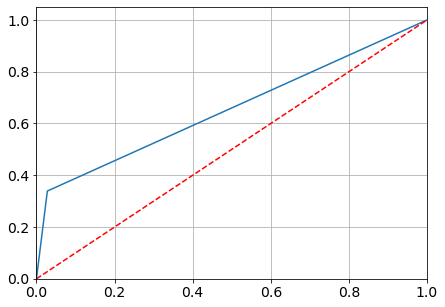

In [56]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, test_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

### Adaboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
be = DecisionTreeClassifier(max_depth=1)

In [59]:
ada = AdaBoostClassifier(base_estimator=be, n_estimators= 100, random_state=1, learning_rate=0.1)
ada.fit(X_train, y_train)

train_pred = ada.predict(X_train)
test_pred = ada.predict(X_test)

Y_pred_ada = ada.predict(X_test)
l = metric(y_test,Y_pred_ada)

j = 0
for i in result.columns:
    result.loc['AdaBoost',i] = l[j]
    j += 1
        
prediction['AdaBoost'] = Y_pred_ada


print('Train F1: ', f1_score(y_train, train_pred))
print('Test F1: ', f1_score(y_test, test_pred))

[[5388   20]
 [ 477   45]]

Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      5408
           1       0.69      0.09      0.15       522

    accuracy                           0.92      5930
   macro avg       0.81      0.54      0.55      5930
weighted avg       0.90      0.92      0.89      5930


Accuracy of Model : 0.9162
Train F1:  0.2075736325385694
Test F1:  0.15332197614991483


In [60]:
adaboost_roc_auc = roc_auc_score(y_test, test_pred)
adaboost_roc_auc

0.5412543358498266

(0.0, 1.05)

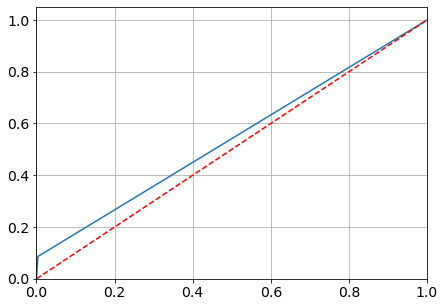

In [61]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, test_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

### Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbc = GradientBoostingClassifier(n_estimators= 300, random_state=1,learning_rate=0.07)
gbc.fit(X_train, y_train)

train_pred = gbc.predict(X_train)
test_pred = gbc.predict(X_test)

print('Train F1: ', f1_score(y_train, train_pred))
print('Test F1: ', f1_score(y_test, test_pred))
print('\n')
print(classification_report(y_test, test_pred))

Train F1:  0.7492984097287185
Test F1:  0.6711864406779662


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5408
           1       0.82      0.57      0.67       522

    accuracy                           0.95      5930
   macro avg       0.89      0.78      0.82      5930
weighted avg       0.95      0.95      0.95      5930



In [64]:
gradient_roc_auc = roc_auc_score(y_test, test_pred)
gradient_roc_auc

0.7783806876147726

(0.0, 1.05)

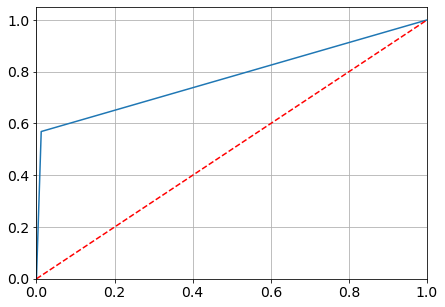

In [65]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, test_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

### Lets tune GBC further since this the best performing one

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
params = {'n_estimators': [50, 100, 150],
          'min_samples_split':[2, 5, 7],
          'max_depth': [1, 3, 5]}

In [68]:
%%time
gbc = GradientBoostingClassifier(random_state=1 )
grid_gbc = GridSearchCV(gbc, param_grid = params, verbose=1, cv = 3, scoring='f1')
grid_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Wall time: 4min 27s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5], 'min_samples_split': [2, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='f1', verbose=1)

In [69]:
grid_gbc.best_params_

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}

In [70]:
grid_gbc.best_score_

0.68436106694721

In [71]:
train_pred = grid_gbc.predict(X_train)
test_pred = grid_gbc.predict(X_test)

Y_pred_gbc = grid_gbc.predict(X_test)
l = metric(y_test,Y_pred_gbc)

j = 0
for i in result.columns:
    result.loc['Gradient Boosting',i] = l[j]
    j += 1
        
prediction['Gradient Boosting'] = Y_pred_gbc


print('Train F1: ', f1_score(y_train, train_pred))
print('Test F1: ', f1_score(y_test, test_pred))

[[5336   72]
 [ 200  322]]

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      5408
           1       0.82      0.62      0.70       522

    accuracy                           0.95      5930
   macro avg       0.89      0.80      0.84      5930
weighted avg       0.95      0.95      0.95      5930


Accuracy of Model : 0.9541
Train F1:  0.8491071428571428
Test F1:  0.7030567685589519


In [72]:
gradient_roc_auc = roc_auc_score(y_test, test_pred)
gradient_roc_auc

0.8017723140402184

(0.0, 1.05)

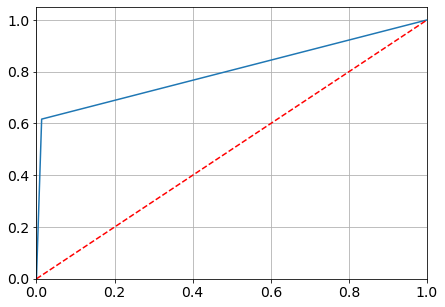

In [73]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, test_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [74]:
#import joblib
#joblib.dump(grid_gbc, "model.pkl") 
#model = joblib.load('model.pkl' ) 
#model.predict(X_test)

In [77]:
import pickle
file = open('model.pkl', 'rb')



# The End